# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

**📝 Load the `spotify_popularity_train.csv` dataset from the provided URL. Display the first few rows. Perform the usual cleaning operations. Store the result in a `DataFrame` named `data`.**

👉 Do not forget to clean the dataset

In [62]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [63]:
import pandas as pd
data = pd.read_csv(url)
data.head(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.00000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand


In [64]:
import unidecode
import string

import re

def remove_accents(words):
    remove_accents = unidecode.unidecode(words)
    return remove_accents

def lowered_text(words):
    lowercased = words.lower()
    return lowercased

def remove_alphas(words):
    sentence = ''.join(c for c in words if c.isalpha() or c == ' ')
    return re.sub(" +", " ", words)

data = data.dropna()

data['clean_name'] = data_2.name.apply(remove_accents)
data['clean_name'] = data_2.clean_name.apply(lowered_text)
data['clean_name'] = data_2.clean_name.apply(remove_alphas)

data['clean_artist'] = data_2.artist.apply(remove_accents)
data['clean_artist'] = data_2.clean_artist.apply(lowered_text)
data['clean_artist'] = data_2.clean_artist.apply(remove_alphas)

data.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist,clean_name,clean_artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford,back in the goodle days,john hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon,worlds which break us - intro mix,driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand,i'm the greatest star,barbra streisand
3,0.42900,0.681,130026,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,-21.457,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,145.333,0.2880,Georgette Heyer,kapitel 281 - der page und die herzogin,georgette heyer
4,0.56200,0.543,129813,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,-7.374,1,Away from You,15,2008-02-11,0.0265,139.272,0.8010,Gerry & The Pacemakers,away from you,gerry & the pacemakers


<AxesSubplot:>

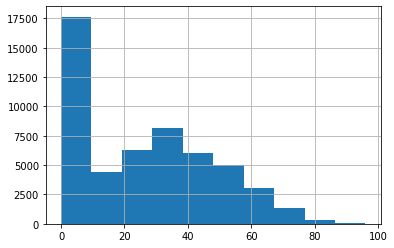

In [76]:
data['popularity'].histst()

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['acousticness',
                 'danceability',
                 'duration_ms', 
                 'energy',
                 'instrumentalness',
                 'liveness',
                 'loudness',
                 'tempo',
                 
                 
                 'valence'
                   ]])

data[['duration_ms', 
      'loudness',
      'tempo']] = scaler.transform(data[['duration_ms', 
                                         'loudness',
                                         'tempo']])

data

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist,clean_name,clean_artist
0,0.65400,0.499,0.044604,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,0.683437,1,Back in the Goodle Days,40,1971,0.0454,0.613781,0.4300,John Hartford,back in the goodle days,john hartford
1,0.00592,0.439,0.099696,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,0.807966,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,0.566883,0.0587,Driftmoon,worlds which break us - intro mix,driftmoon
2,0.73400,0.523,0.049999,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,0.760762,1,I'm The Greatest Star,40,1968-09-01,0.2140,0.311568,0.4640,Barbra Streisand,i'm the greatest star,barbra streisand
3,0.42900,0.681,0.025872,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,0.604653,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,0.596833,0.2880,Georgette Heyer,kapitel 281 - der page und die herzogin,georgette heyer
4,0.56200,0.543,0.025828,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,0.825584,1,Away from You,15,2008-02-11,0.0265,0.571942,0.8010,Gerry & The Pacemakers,away from you,gerry & the pacemakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.16400,0.512,0.010484,0.907,0,2GJxRwFe8oLcbXgTw9P5of,0.004870,6,0.8010,0.818838,1,"Incidental CB Dialogue - Bandit, Smokey & Snowman",25,1977-01-01,0.6620,0.351592,0.3150,Burt Reynolds,"incidental cb dialogue - bandit, smokey & snowman",burt reynolds
52313,0.77300,0.533,0.038974,0.659,0,0EtAPdqg7TysBXKDbnzuSO,0.773000,2,0.1130,0.798240,0,Samba De Verão,43,1965-06-01,0.0426,0.650355,0.6140,Walter Wanderley,samba de verao,walter wanderley
52314,0.45600,0.548,0.063588,0.568,0,1s78GLrkZT7rTKAEu056M8,0.000000,6,0.0892,0.857367,1,Kekkonnouta,0,2020-04-15,0.0275,0.318245,0.3380,accel,kekkonnouta,accel
52315,0.96500,0.360,0.043908,0.132,0,1LUBU2WI4z0dALUM16hoAH,0.000000,10,0.1260,0.611603,1,Die Meistersinger von Nürnberg - Act 1: Wohl M...,0,1952-01-01,0.0355,0.332266,0.4100,Richard Wagner,die meistersinger von nurnberg - act 1: wohl m...,richard wagner


### Save your results

Run the following cell to save your results.

In [67]:
from nbresult import ChallengeResult

ChallengeResult(
    "c5_data_cleaning",
    data=data).write()

## Baseline

**📝 We want to use a metric that measures the prediction error in the same unit than `popularity`. In addition, it should strongly penalize largest errors. Which sklearn's [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use? Store its exact name as string below**

In [85]:
scoring = "neg_mean_squared_error"

**📝 Let's build a baseline model using only the numerical features in our dataset.**
- Build `X_baseline` with only numerical features
- Build `y` your target containing the `popularity`
- Then 5 times cross validate the baseline linear model of your choice (do not fine tune it)
- Store your mean performance in a `float` variable named `baseline_score`

In [86]:
data

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist,clean_name,clean_artist
0,0.65400,0.499,0.044604,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,0.683437,1,Back in the Goodle Days,40,1971,0.0454,0.613781,0.4300,John Hartford,back in the goodle days,john hartford
1,0.00592,0.439,0.099696,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,0.807966,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,0.566883,0.0587,Driftmoon,worlds which break us - intro mix,driftmoon
2,0.73400,0.523,0.049999,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,0.760762,1,I'm The Greatest Star,40,1968-09-01,0.2140,0.311568,0.4640,Barbra Streisand,i'm the greatest star,barbra streisand
3,0.42900,0.681,0.025872,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,0.604653,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,0.596833,0.2880,Georgette Heyer,kapitel 281 - der page und die herzogin,georgette heyer
4,0.56200,0.543,0.025828,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,0.825584,1,Away from You,15,2008-02-11,0.0265,0.571942,0.8010,Gerry & The Pacemakers,away from you,gerry & the pacemakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.16400,0.512,0.010484,0.907,0,2GJxRwFe8oLcbXgTw9P5of,0.004870,6,0.8010,0.818838,1,"Incidental CB Dialogue - Bandit, Smokey & Snowman",25,1977-01-01,0.6620,0.351592,0.3150,Burt Reynolds,"incidental cb dialogue - bandit, smokey & snowman",burt reynolds
52313,0.77300,0.533,0.038974,0.659,0,0EtAPdqg7TysBXKDbnzuSO,0.773000,2,0.1130,0.798240,0,Samba De Verão,43,1965-06-01,0.0426,0.650355,0.6140,Walter Wanderley,samba de verao,walter wanderley
52314,0.45600,0.548,0.063588,0.568,0,1s78GLrkZT7rTKAEu056M8,0.000000,6,0.0892,0.857367,1,Kekkonnouta,0,2020-04-15,0.0275,0.318245,0.3380,accel,kekkonnouta,accel
52315,0.96500,0.360,0.043908,0.132,0,1LUBU2WI4z0dALUM16hoAH,0.000000,10,0.1260,0.611603,1,Die Meistersinger von Nürnberg - Act 1: Wohl M...,0,1952-01-01,0.0355,0.332266,0.4100,Richard Wagner,die meistersinger von nurnberg - act 1: wohl m...,richard wagner


In [87]:
X_baseline = data[['acousticness', 
                   'danceability', 
                   'duration_ms', 
                   'explicit',
                   'energy',
                   'instrumentalness', 
                   'liveness', 
                   'loudness',
                   'mode',
                   'speechiness',
                   'tempo',
                   'valence'
                  ]]
y= data[['popularity']]

In [89]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [91]:
baseline_model = DummyRegressor(strategy="median")
cv_results = cross_validate(baseline_model,X_baseline,y, scoring=scoring)

In [98]:
baseline_score = cv_results['test_score'].mean()

In [100]:
baseline_score

-478.27094112282094

### Save your results

Run the following cell to save your results.

In [101]:
from nbresult import ChallengeResult

ChallengeResult(
    "baseline",
    scoring=scoring,
    baseline_score=baseline_score).write()

## Feature engineering

Let's now use the features that we left aside: `release_date` and `artist` to improve the performance of our model. We'll create them manually in a train vs. test context first (and pipeline them later)

### holdout
**📝 Create the 4 variables `X_train` `y_train`, `X_test`, `y_test` with a 50% split with random sampling**

### year

**📝 Create `X_train_year` and `X_test_year` by adding the new column `year` containing the release year of the track as integer**

### artist

How could we use the `artist` column? There are too many artists to one hot encode it.  
We could instead create an `artist_popularity` feature containing the mean popularity of an artist, computed as the mean popularity of all tracks the artist released _on the train set_.

#### Process artist popularity from the Training set

**📝 Compute and store the `artist_popularity` as a new pandas `Series`**  

#### Apply the artist popularity to `X_train_year`

**📝 Create a new DataFrame `X_train_engineered` which adds a new column to the existing `X_train_year` with the `artist_popularity` corresponding to the song's artist.** 

🚨 Make sure that the target `popularity` does not end up in `X_train_engineered` 

#### Apply the artist popularity to `X_test_year`

**📝 Similarily, create a new DataFrame `X_test_engineered` which also adds a new column to the existing `X_test_year` with the `artist_popularity` corresponding to the song's artist, computed from the training set.**

🚨**If an artist has never been seen in the training set, use the global mean popularity of all the tracks of `X_train`**

### Save your results

Run the following cell to save your results.

In [ ]:
from nbresult import ChallengeResult

_ = pd.concat([X_train_engineered, X_test_engineered])

ChallengeResult("c7_feature_engineering",
    shape = _.shape,
    cols = _.columns,
    years = _.get("year"),
    popularities = _.get("artist_popularity"),
).write()

### Performance

**📝 Let's see how these features impact the performance of our model. Retrain the same baseline model on numerical values only, but adding the new features `year` and `artist_popularity`, and see how the performance is impacted. Save the performance in a `float` variable named `score_engineered`**

👉 Do not fine tune the model yet

### Save your results

Run the following cell to save your results.

In [ ]:
from nbresult import ChallengeResult

ChallengeResult(
    "c7_score_engineering",
    scoring=scoring,
    score_engineered=score_engineered).write()

## Pipelining

**📝 Let's create a full sklearn preprocessing pipeline called `preproc`. It should integrate our feature engineering for `year` and `artist_popularity`, as well as any other preprocessing of your choice**

**Store also the number of columns/feature after preprocessing your inputs in a variable `col_number`**

**🚨⚠️ Advice: SKIP the `ArtistPopularityTransformer` if you don't have time to do it. It is better for you to have a working pipeline rather than NO pipeline at all**

In [ ]:
# 👉 Do not hesitate to reload clean new dataset if you need a fresh start
y = data.popularity
X = data.drop("popularity", axis=1)

In [ ]:
# Run this cell to visualize your pipeline as you build it
from sklearn import set_config; set_config(display='diagram')

In [ ]:
# We give you below the skeleton of the custom ArtistPopularityTransformer to complete

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity

        # process mean popularity

        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity

        # fills popularity of unknown artists with song global mean popularity

        return # TODO return X_copy

#### Save your results

Run the following cell to save your results.

In [ ]:
# Print below your preproc here for the correctors
from sklearn import set_config; set_config(display='diagram')
preproc

In [ ]:
from nbresult import ChallengeResult

ChallengeResult(
    "c6_preprocessing",
    col_number=col_number
).write()

## Training

📝 Time to optimize 

- **Add an estimator to your pipeline (only from scikit-learn)** 

- **Train your pipeline and fine-tune (optimize) your estimator to get the best prediction score**

- **You must create 2 pipelines (one with a linear model, one with an ensemble model)**

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

### Ensemble

### Save your results

Run the following cell to save your results.

In [ ]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_linear

In [ ]:
# Print below your best pipe for correction purpose
pipe_ensemble

In [ ]:
from nbresult import ChallengeResult

ChallengeResult("c8_c9_c11_c13_model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**